## Data exploration - Deliverable #1

In [3]:
#Import packages
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
#Set variables used throughout the file
sets = ["test","train","val"]
labels = ["NORMAL","PNEUMONIA"]
current_dir = os.getcwd()

(1317, 1857)


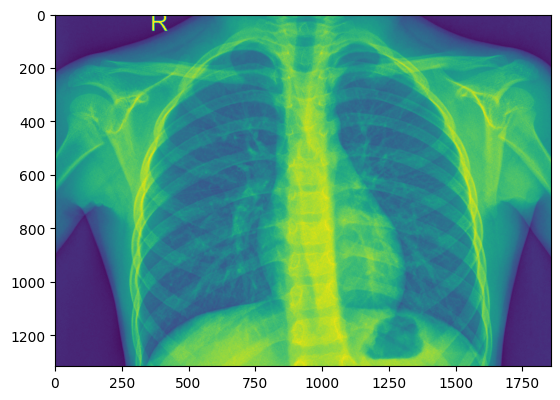

In [5]:
#Read images - test
img_test = cv2.imread("data/test/NORMAL/IM-0001-0001.jpeg", cv2.IMREAD_UNCHANGED)
print(img_test.shape)
plt.imshow(img_test)

In [6]:
#Create df with images info
imgs_df = pd.DataFrame(columns = ['filename', 'shape'])
for dataset in sets:
    for label in labels:
        rel_path = "data/{}/{}".format(dataset,label)
        img_directory = os.path.join(current_dir, rel_path)
        for img_file in os.listdir(img_directory):
            img_path = os.path.join(img_directory,img_file)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            img_shape = img.shape
            img_l = img_shape[0]
            img_w = img_shape[1]
            img_ratio = round(img_l/img_w,2)
            imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
                'length':img_l,'width':img_w,'ratio':img_ratio,'label':label,
                'set':dataset},ignore_index=True)

imgs_df


/tmp/user/23109/ipykernel_3482332/2498105867.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
/tmp/user/23109/ipykernel_3482332/2498105867.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
/tmp/user/23109/ipykernel_3482332/2498105867.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
/tmp/user/23109/ipykernel_3482332/2498105867.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

,filename,shape,length,width,ratio,label,set
0,data/test/NORMAL/NORMAL2-IM-0019-0001.jpeg,"(2087, 2043)",2087.0,2043.0,1.02,NORMAL,test
1,data/test/NORMAL/NORMAL2-IM-0354-0001.jpeg,"(1072, 1470)",1072.0,1470.0,0.73,NORMAL,test
2,data/test/NORMAL/IM-0009-0001.jpeg,"(1443, 1852)",1443.0,1852.0,0.78,NORMAL,test
3,data/test/NORMAL/NORMAL2-IM-0322-0001.jpeg,"(813, 1256)",813.0,1256.0,0.65,NORMAL,test
4,data/test/NORMAL/NORMAL2-IM-0287-0001.jpeg,"(1585, 1785)",1585.0,1785.0,0.89,NORMAL,test
...,...,...,...,...,...,...,...
5851,data/val/PNEUMONIA/person1947_bacteria_4876.jpeg,"(664, 1152)",664.0,1152.0,0.58,PNEUMONIA,val
5852,data/val/PNEUMONIA/person1946_bacteria_4874.jpeg,"(592, 968)",592.0,968.0,0.61,PNEUMONIA,val
5853,data/val/PNEUMONIA/person1950_bacteria_4881.jpeg,"(864, 1256)",864.0,1256.0,0.69,PNEUMONIA,val
5854,data/val/PNEUMONIA/person1946_bacteria_4875.jpeg,"(712, 1072)",712.0,1072.0,0.66,PNEUMONIA,val


In [17]:
imgs_df.label.value_counts()

PNEUMONIA    4273
NORMAL       1583
Name: label, dtype: int64

In [13]:
#Count number of labels
len(imgs_df.loc[imgs_df.loc[:,"label"]=="NORMAL",:])
len(imgs_df.loc[imgs_df.loc[:,"label"]=="PNEUMONIA",:])
d = {} 

for dataset in sets:
    for label in labels:
        if dataset not in d:
            d[dataset] = {'PNEUMONIA':0, 'NORMAL': 0}
        n_obs = len(imgs_df.loc[(imgs_df.loc[:,"label"]=="{}".format(label)) & (imgs_df.loc[:,"set"]=="{}".format(dataset)),:])
        d[dataset][label] = n_obs
        print("Number of observations in",dataset, "with label", label," = ",n_obs)

d 

Number of observations in test with label NORMAL  =  234
Number of observations in test with label PNEUMONIA  =  390
Number of observations in train with label NORMAL  =  1341
Number of observations in train with label PNEUMONIA  =  3875
Number of observations in val with label NORMAL  =  8
Number of observations in val with label PNEUMONIA  =  8


AttributeError: 'DataFrame' object has no attribute 'labels'

In [8]:
#Summary statistics for imgs shape

imgs_df.loc[:,["length","width","ratio"]].describe()

,length,width,ratio
count,5856.000000,5856.000000,5856.000000
mean,970.689037,1327.880806,0.712900
std,383.392117,363.500922,0.117391
min,127.000000,384.000000,0.300000
25%,688.000000,1056.000000,0.630000
50%,888.000000,1281.000000,0.710000
75%,1187.000000,1560.000000,0.790000
max,2713.000000,2916.000000,1.200000


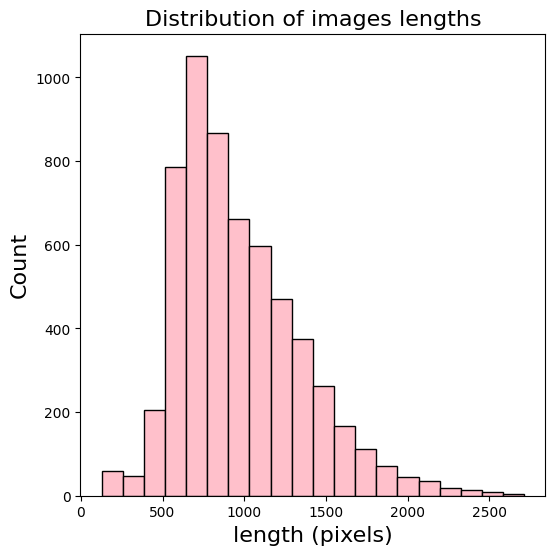

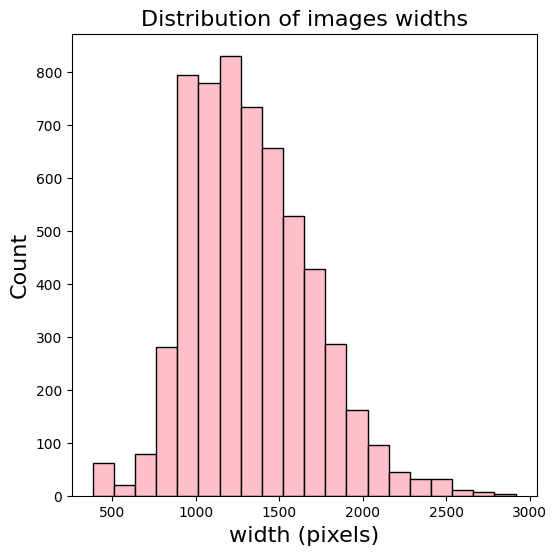

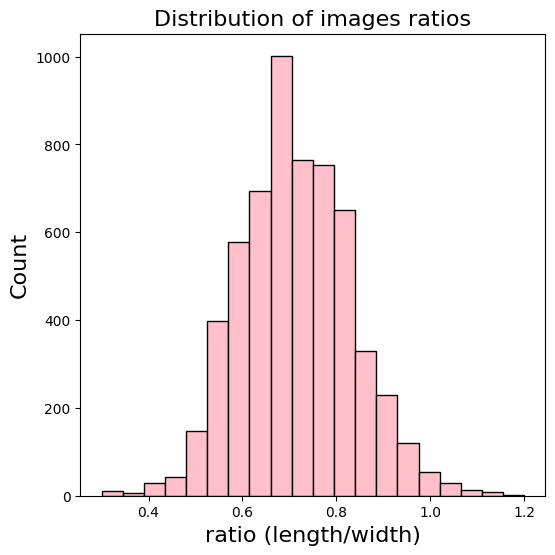

In [9]:
#Create function to plot shapes and plot distribution for images attributes

def plot_shape_distrib(shape_col,n_bins=20):
    """ 
    Plot a histogram to visualize distribution of images shapes attributes
    Input:
    - shape_col(str): Column to visualize in histogram
    -n_bins(int): Number of bins for the 
    Return:
        None, visualizes plt histogram on Jupyter Notebook
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    if shape_col != "ratio":
        ax.set_xlabel("{} (pixels)".format(shape_col), fontsize=16)
    else: 
        ax.set_xlabel("ratio (length/width)", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    ax.set_title("Distribution of images {}s".format(shape_col), fontsize=16)
    ax.hist(imgs_df.loc[:,shape_col], color='pink',edgecolor='black',bins=n_bins)

plot_shape_distrib("length")
plot_shape_distrib("width")
plot_shape_distrib("ratio")


In [10]:
#Save csv for each dataset
imgs_df_test = imgs_df.loc[imgs_df.loc[:,"set"]=="test",:] 
imgs_df_train = imgs_df.loc[imgs_df.loc[:,"set"]=="train",:] 
imgs_df_val = imgs_df.loc[imgs_df.loc[:,"set"]=="val",:] 

imgs_df_test.to_csv(os.path.join(current_dir, "data/csv_files/test.csv"), index = False)
imgs_df_train.to_csv(os.path.join(current_dir, "data/csv_files/train.csv"), index = False)
imgs_df_val.to_csv(os.path.join(current_dir, "data/csv_files/val.csv"), index = False)
